<a href="https://colab.research.google.com/github/saranshg20/3d-pose-warping/blob/master/Task1_Dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Cifar10 dataset and initialised training data and test data
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [2]:
#Analysing the order of the dataset
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


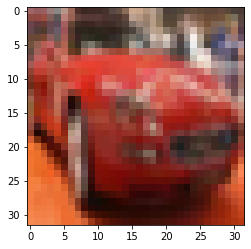

In [4]:
#Plotting the x_train dataset
import matplotlib.pyplot as plt
# %matplotlib inline#The %matplotlib inline tells the notebook that you wish for the image to display within the image

img = plt.imshow(x_train[5])

In [5]:
# Let’s figure out what the label of this image is in our dataset:
print('The label is:',y_train[1])

The label is: [9]


In [6]:
#Changing the label for y_train using the one_hot_encoding
import tensorflow as tf
# tf.disable_v2_behavior()
from tensorflow import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)


In [7]:
print('The one hot label is:', y_train_one_hot[3])


The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
#Processing the training data so that it c=varies between 0 and 1
x_train = x_train.astype('float32') #Using numpy to function 'astype' for specifying dataset
x_test = x_test.astype('float32')
x_train = x_train/255
y_train = y_train/255


In [9]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [10]:
# ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time. ... Due to this reason, during the backpropogation process, the weights and biases for some neurons are not updated
# Softmax is a very interesting activation function because it not only maps our output to a [0,1] range but also maps each output in such a way that the total sum is 1. The output of Softmax is therefore a probability distribution
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D


In [11]:
#Call an empty Sequential model
model = Sequential()

In [12]:
#Adding a layer to our model
model.add(Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
#Notice that we don't mentioned stride///Bcz stride is by default taken to be 1

In [13]:
#subsequent layers does not have this specification since they can infer the input size from the output size of the previous layer.
# Adding 2nd layer to our model
model.add(Conv2D(32,(3,3), activation='relu', padding= 'same'))


In [14]:
#Adding a maxpooling layer# Again stride = 1..by default
model.add(MaxPooling2D(pool_size = (2,2)))

In [15]:
#Adding a dropout layer to prevent overfitting
#Dropout Rate
# The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout, and 0.0 means no outputs from the layer. A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout rate, such as of 0.8
model.add(Dropout(0.25))

In [16]:
# Adding 3rd layer to our model
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

In [17]:
# Adding 4thnd layer to our model
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

In [18]:
#Adding a maxpooling layer# Again stride = 1..by default
model.add(MaxPooling2D(pool_size = (2,2)))

In [19]:
#Adding a dropout layer to prevent overfitting
#Dropout Rate
# The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout, and 0.0 means no outputs from the layer. A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout rate, such as of 0.8
model.add(Dropout(0.25))

In [20]:
#This flatten inbuilt function is used to convert cubically arranged neurons into a row
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [21]:

model.add(Dense(512, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [22]:
model.add(Dropout(0.5))

In [23]:
#Adding last layer to our network
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [25]:
#Compiling our model
#The loss function that we used is categorical_crossentropy which
#is applicable for classification problem of many classes

#Adam is simply a type of stochastic gradient descent (with a few modifications) so that it trains better

#A metric is a function that is used to judge the performance of
#your model. Metric functions are similar to loss functions, 
#except that the results from evaluating a metric are not used when
#training the model. Note that you may use any loss function as a metric.
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#validation_split is a shortcut to split our dataset.
#This by default specify that this data will be used for testing
#validation_data will specify the dataset for evaluation...in this case it is x_test,y_test
#validation_data will override validation_split.
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs = 3, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 270s 203ms/step - loss: 1.7846 - accuracy: 0.3361 - val_loss: 1.1495 - val_accuracy: 0.5869
Epoch 2/20
1250/1250 [==============================] - 259s 207ms/step - loss: 1.1584 - accuracy: 0.5859 - val_loss: 0.9387 - val_accuracy: 0.6649
Epoch 3/20
1250/1250 [==============================] - 258s 206ms/step - loss: 0.9550 - accuracy: 0.6597 - val_loss: 0.8185 - val_accuracy: 0.7138
Epoch 4/20
1250/1250 [==============================] - 260s 208ms/step - loss: 0.8473 - accuracy: 0.7006 - val_loss: 0.7910 - val_accuracy: 0.7260
Epoch 5/20
1250/1250 [==============================] - 260s 208ms/step - loss: 0.7784 - accuracy: 0.7239 - val_loss: 0.7518 - val_accuracy: 0.7417
Epoch 6/20
 981/1250 [======================>.......] - ETA: 53s - loss: 0.7051 - accuracy: 0.7537